In [38]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [39]:
tickers = ['IWB', 'BND']
weights = [0.60, 0.40] # 60% SPY, 40% BND

# Define date range (e.g., last 10 years)
end_dt = datetime(2025, 4, 20)
start_dt = end_dt - timedelta(days=20*365)

start_date_str = start_dt.strftime('%Y-%m-%d')
end_date_str = end_dt.strftime('%Y-%m-%d')

prices = yf.download(tickers, start=start_date_str, end=end_date_str)["Close"]
prices

[*********************100%***********************]  2 of 2 completed


Ticker,BND,IWB
Date,,
2005-04-25,NaN,44.142788
2005-04-26,NaN,43.790230
2005-04-27,NaN,43.846638
2005-04-28,NaN,43.367142
2005-04-29,NaN,43.931236
...,...,...
2025-04-11,72.019997,292.429993
2025-04-14,72.430000,295.149994
2025-04-15,72.610001,294.420013


In [40]:
returns = prices.pct_change().dropna()
weights = {"IWB": 0.6, "BND": 0.4}
portfolio_returns = sum([returns[ticker] * weights[ticker] for ticker in returns.columns])
portfolio_returns

Date
2007-04-11   -0.004407
2007-04-12    0.003538
2007-04-13    0.001107
2007-04-16    0.006433
2007-04-17    0.001538
                ...   
2025-04-11    0.009315
2025-04-14    0.007858
2025-04-15   -0.000490
2025-04-16   -0.011391
2025-04-17    0.000370
Length: 4536, dtype: float64

In [41]:
sigma_sq_portfolio = portfolio_returns.var()
sigma_sq_stocks = pow(weights["IWB"], 2) * returns["IWB"].var() + weights["IWB"] * weights["BND"] * np.cov([returns["BND"], returns["IWB"]])[0,1]
sigma_sq_bonds = pow(weights["BND"], 2) * returns["BND"].var() + weights["IWB"] * weights["BND"] * np.cov([returns["BND"], returns["IWB"]])[0,1]

p_stocks = sigma_sq_stocks/sigma_sq_portfolio
p_bonds =sigma_sq_bonds/sigma_sq_portfolio

In [53]:
print(sigma_sq_portfolio)
print(sigma_sq_stocks)
print(sigma_sq_bonds)

5.8390569191146827e-05
5.6822969162952554e-05
1.5676000281942652e-06


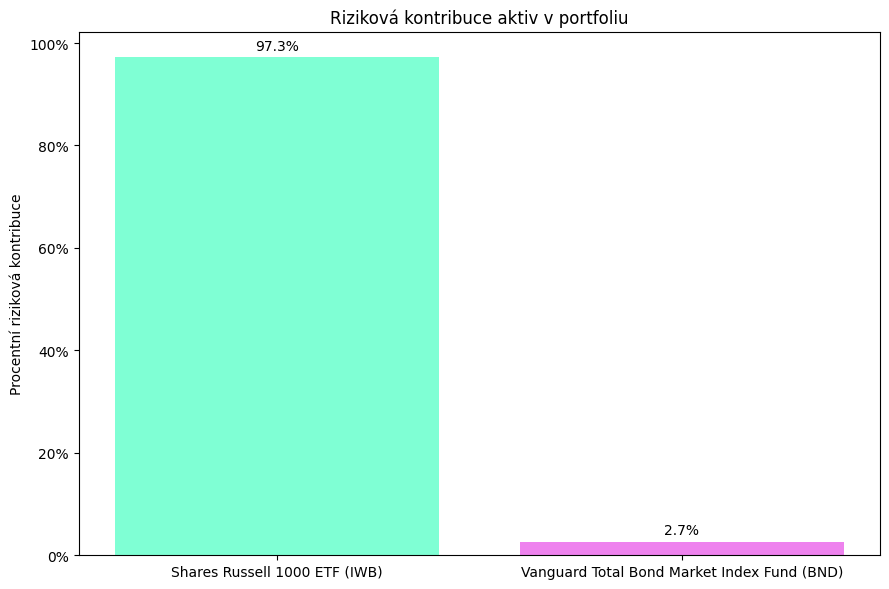

In [52]:
fig, ax = plt.subplots(figsize=(9, 6))

assets = ['Shares Russell 1000 ETF (IWB)', 'Vanguard Total Bond Market Index Fund (BND)']
percent_values = [p_stocks, p_bonds]

bars = ax.bar(assets, percent_values, color=['aquamarine', 'violet'])
ax.set_title('Riziková kontribuce aktiv v portfoliu')
ax.set_ylabel('Procentní riziková kontribuce')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for bar in bars:
  height = bar.get_height()
  ax.annotate(f'{height:.1%}', 
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')

plt.tight_layout()
plt.show()